In [44]:
import matplotlib.pyplot as plt
import random

In [45]:
lst = []
max_possible_random = int(input("Введіть максимальне можливе число: "))
min_possible_random = int(input("Введіть мінімальне можливе число: "))
random_number_length = int(input("Введіть об'єм вибірки: "))

for i in range(random_number_length):
    lst.append(random.randint(min_possible_random, max_possible_random))
print(lst)

Введіть максимальне можливе число:  15
Введіть мінімальне можливе число:  3
Введіть об'єм вибірки:  50


[7, 8, 8, 11, 12, 4, 14, 9, 8, 5, 10, 8, 13, 13, 7, 6, 14, 13, 13, 3, 15, 8, 8, 5, 14, 7, 11, 5, 7, 13, 4, 7, 6, 3, 6, 13, 8, 5, 12, 7, 13, 5, 14, 10, 14, 9, 9, 13, 15, 7]


In [46]:
# Functions
def get_variant_row(lst):
    return sorted(lst)

def get_frequency_table(lst):
    lst = get_variant_row(lst)
    freq = {}
    for el in lst:
        if el in freq:
            freq[el] += 1
        else:
            freq[el] = 1
    return freq
            
def show_frequency_table(freq):
    print('Частотна таблиця')
    print('Xi          Ni')
    for key, val in freq.items():
        print(key, '          ', val)

In [47]:
# Visualisation
def freq_diagram(freq):
    plt.bar(freq.keys(), freq.values())
    plt.xlabel('Елементи')
    plt.ylabel('Частота')
    plt.title('Діаграма частот')
    plt.show()
    
def freq_polygon(freq):
    plt.plot(freq.keys(), freq.values(), marker='o', linestyle='-')
    plt.xlabel('Елементи')
    plt.ylabel('Частота')
    plt.title('Полігон частот')
    plt.show()

In [48]:
# Numerical characteristics
def get_average(lst):
    return sum(lst) / len(lst)

def get_mediana(lst):
    length = len(lst)
    
    if length % 2 == 1: 
        return lst[length // 2]
    else:
        middle_right = length // 2
        middle_left = middle_right - 1
        return (lst[middle_left] + lst[middle_right]) / 2

def get_moda(lst):
    res = []
    max_count = 0
    for i in lst:
        if lst.count(i) > max_count:
            max_count = lst.count(i)
    for i in lst:
        if lst.count(i) == max_count:
            res.append(i)
    return list(set(res))

def get_dev(lst):
    res = 0
    avg = get_average(lst)
    freq = get_frequency_table(lst)
    for k, v in freq.items():
        res += v*(k-avg)**2
    return res

def get_variance(lst):
    return get_dev(lst) / (len(lst)-1)

def get_dyspersia(lst):
    return get_dev(lst) / len(lst)

def get_square_avg(lst):
    return get_dyspersia(lst)**0.5

def get_standart(lst):
    return get_variance(lst)**0.5

def get_scope(lst):
    return max(lst)-min(lst)

def get_moment(lst, s):
    res = 0
    avg = get_average(lst)
    freq = get_frequency_table(lst)
    for k, v in freq.items():
        res += v*(k-avg)**s
    return res/len(lst)

def get_asymetry(lst):
    return get_moment(lst,3)/get_moment(lst,2)**1.5

def get_exes(lst):
    return get_moment(lst,4)/get_moment(lst,2)**2 - 3

def get_variation(lst):
    return get_standart(lst)/get_average(lst)

def get_quantiles(lst):
    freq = get_frequency_table(lst)
    res = []
    for i in range(3):
        suma = 0
        q = (i+1)*len(lst)/4
        for k, v in freq.items():
            suma += v
            if suma >= q:
                res.append(k)
                break
    return res

def get_deciles(lst):
    freq = get_frequency_table(lst)
    res = []
    for i in range(9):
        suma = 0
        q = (i+1)*len(lst)/10
        for k, v in freq.items():
            suma += v
            if suma >= q:
                res.append(k)
                break
    return res

def get_cetiles(lst):
    freq = get_frequency_table(lst)
    res = []
    for i in range(100):
        suma = 0
        q = (i+1)*len(lst)/100
        for k, v in freq.items():
            suma += v
            if suma >= q:
                res.append(k)
                break
    return res

In [49]:
print('Вибірка:')
print(lst)

Вибірка:
[7, 8, 8, 11, 12, 4, 14, 9, 8, 5, 10, 8, 13, 13, 7, 6, 14, 13, 13, 3, 15, 8, 8, 5, 14, 7, 11, 5, 7, 13, 4, 7, 6, 3, 6, 13, 8, 5, 12, 7, 13, 5, 14, 10, 14, 9, 9, 13, 15, 7]


In [50]:
print('Варіаційний ряд:')
print(get_variant_row(lst))

Варіаційний ряд:
[3, 3, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15]


In [51]:
freq = get_frequency_table(lst)
show_frequency_table(freq)

Частотна таблиця
Xi          Ni
3            2
4            2
5            5
6            3
7            7
8            7
9            3
10            2
11            2
12            2
13            8
14            5
15            2


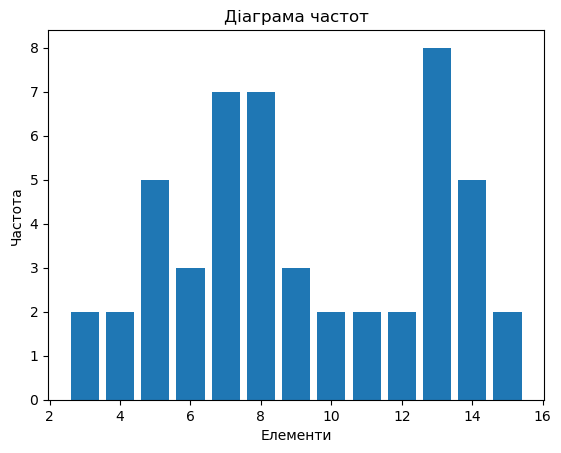

In [52]:
freq_diagram(freq)

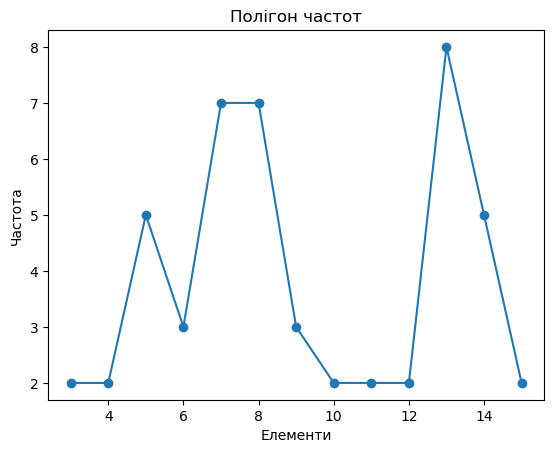

In [53]:
freq_polygon(freq)

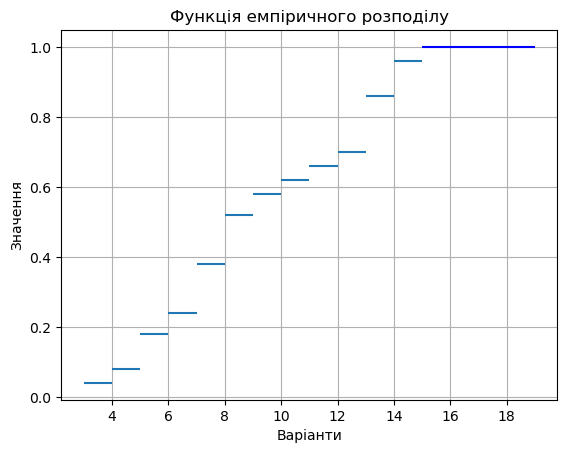

In [54]:
def emp_func(freq):
    variants = list(freq.keys())
    length = len(lst)
    total = 0
    values = []
    for val in variants:
        total += freq[val]
        values.append(total/length)
    
    return variants, values

def plot_emp_func(variants, values):
    for i in range(len(variants) - 1):
        plt.hlines(values[i], variants[i], variants[i + 1])
    plt.hlines(values[i+1], variants[i+1], variants[i+1]+4, color='b')
    plt.xlabel('Варіанти')
    plt.ylabel('Значення')
    plt.title('Функція емпіричного розподілу')
    plt.grid(True)
    plt.show()
    

var,val = emp_func(freq)
plot_emp_func(var,val)

In [55]:
print("Числові характеристики:")
print("Середнє арифметичне:", get_average(lst))
print("Медіана:", get_mediana(lst))
print("Мода:", get_moda(lst))
print("Девiацiя:", get_dev(lst))
print("Варіанса:", get_variance(lst))
print("Вибіркова дисперсія:", get_dyspersia(lst))
print("Середньоквадратчне відхилення вибірки:", get_square_avg(lst))
print("Стандарт:", get_standart(lst))
print("Варіація:", get_variation(lst))
print("Розмах:", get_scope(lst))
print("Момент 2:", get_moment(lst,2))
print("Момент 3:", get_moment(lst,3))
print("Момент 4:", get_moment(lst,4))
print("Асиметрія:", get_asymetry(lst))
print("Ексес:", get_exes(lst))
print("Квантилі:", get_quantiles(lst))
print("Децилі:", get_deciles(lst))
print("Цетилі:", get_cetiles(lst))

Числові характеристики:
Середнє арифметичне: 9.18
Медіана: 10.5
Мода: [13]
Девiацiя: 615.3800000000001
Варіанса: 12.558775510204084
Вибіркова дисперсія: 12.307600000000003
Середньоквадратчне відхилення вибірки: 3.5082189213331603
Стандарт: 3.543836270230904
Варіація: 0.3860388093933447
Розмах: 12
Момент 2: 12.307600000000003
Момент 3: 3.248064000000006
Момент 4: 264.16774671999997
Асиметрія: 0.07522540218315615
Ексес: -1.2560539504511046
Квантилі: [7, 8, 13]
Децилі: [5, 6, 7, 8, 8, 10, 12, 13, 14]
Цетилі: [3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15]


In [56]:
# TASK 2

def create_intervals(lst, n):
    res = {}
    min_val = min(lst)
    max_val = max(lst)
    
    interval_width = (max_val - min_val) / n
    
    intervals = [(min_val + i * interval_width, min_val + (i + 1) * interval_width) for i in range(n)]
    
    frequencies = [0] * n
    for value in lst:
        for i, (interval_start, interval_end) in enumerate(intervals):
            if interval_start <= value < interval_end:
                frequencies[i] += 1
                break
            if value == max_val:
                frequencies[-1]+=1
                break
    for i in range(n):
        res[intervals[i]] = frequencies[i]
    return res
    

def get_mid(interval):
    return (interval[0]+interval[1])/2


def plot_histogram(intervals, frequencies):
    plt.bar(range(len(intervals)), frequencies, edgecolor='black')
    plt.xlabel('Інтервали')
    plt.ylabel('Частоти')
    plt.title('Гістограма інтервальної вибірки')
    plt.xticks(range(len(intervals)), [f'{interval[0]}-{interval[1]}' for interval in intervals])
    plt.show()


In [57]:
print("Вибірка:")
print(lst)

Вибірка:
[7, 8, 8, 11, 12, 4, 14, 9, 8, 5, 10, 8, 13, 13, 7, 6, 14, 13, 13, 3, 15, 8, 8, 5, 14, 7, 11, 5, 7, 13, 4, 7, 6, 3, 6, 13, 8, 5, 12, 7, 13, 5, 14, 10, 14, 9, 9, 13, 15, 7]


In [58]:
n = int(input("Введіть кількість інтервалів для поділу:"))
freq_interval = create_intervals(lst,n)


Введіть кількість інтервалів для поділу: 4


In [59]:
print('Interval                    n')
for k, v in freq_interval.items():
    print(k, '              ', v)

Interval                    n
(3.0, 6.0)                9
(6.0, 9.0)                17
(9.0, 12.0)                7
(12.0, 15.0)                17


Інтервальний статистичний розподіл:


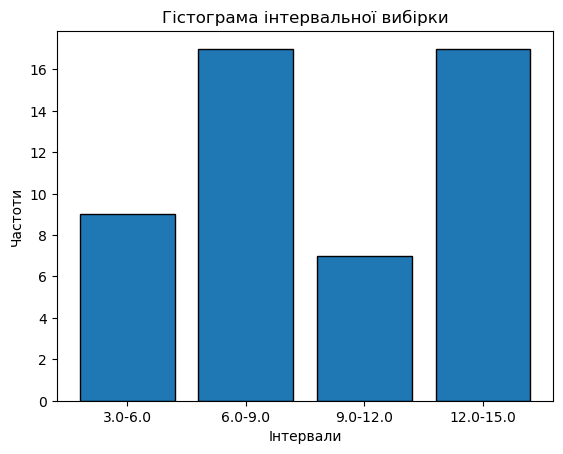

In [60]:
print("Інтервальний статистичний розподіл:")
plot_histogram(freq_interval.keys(), freq_interval.values())

Емпірична функція для інтервального розподілу


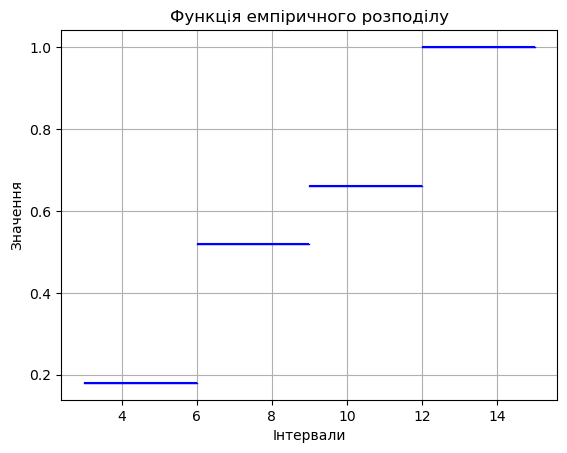

In [61]:
def plot_interval_emp_func(intervals,values):
    for i in range(len(intervals)):
        plt.hlines(values[i], intervals[i][0], intervals[i][1], colors='b')
        plt.plot([intervals[i][0], intervals[i][1]], [values[i], values[i]], color='b', linewidth=1)
    plt.xlabel('Інтервали')
    plt.ylabel('Значення')
    plt.title('Функція емпіричного розподілу')
    plt.grid(True)
    plt.show()
    
    

var_interval,val_interval = emp_func(freq_interval)
print("Емпірична функція для інтервального розподілу")
plot_interval_emp_func(var_interval,val_interval)

In [62]:
# Interval numerical characteristics
def get_interval_average(freq_interval):
    intervals = list(freq_interval.keys())
    frequencies = list(freq_interval.values())
    total_cases = sum(frequencies)
    weighted_sum = sum(get_mid(interval) * freq for interval, freq in zip(intervals, frequencies))
    res = weighted_sum / total_cases
    return res


def get_interval_median(freq_interval):
    intervals = list(freq_interval.keys())
    frequencies = list(freq_interval.values())
    x1=0
    f1 = 0
    f2 = 0
    suma = 0
    for i in range(len(intervals)):
        suma += frequencies[i]/sum(frequencies) 
        if suma >= 0.5:
            x1 = intervals[i][0]
            x2 = intervals[i][1]
            f = frequencies[i]
            break
            
    median = x1 + ((x2 - x1) / f)*(len(intervals)/2 - suma-f)
    return median

def get_interval_moda(freq_interval):
    intervals = list(freq_interval.keys())
    frequencies = list(freq_interval.values())
    max_freq_index = frequencies.index(max(frequencies))
    h1 = intervals[max_freq_index][1]
    h2 = intervals[max_freq_index][0]
    n1 = frequencies[max_freq_index]
    try:
        n2 = frequencies[max_freq_index-1]
    except:
        n2 = frequencies[max_freq_index]
    try:
        n3 = frequencies[max_freq_index+1]
    except:
        n3 = frequencies[max_freq_index]
    return h2+((n1-n2)/((n1-n2)+(n1-n3))*(h1-h2))

def get_interval_deviation(freq_interval):
    intervals = list(freq_interval.keys())
    frequencies = list(freq_interval.values())
    midpoints = [get_mid(interval) for interval in intervals]
    avg = get_interval_average(freq_interval)
    deviation = sum(freq * (midpoint - avg) ** 2 for midpoint, freq in zip(midpoints, frequencies))
    return deviation

def get_interval_variance(freq_interval):
    return get_interval_deviation(freq_interval)/(len(freq_interval) - 1)

def get_interval_standart(freq_interval):
    return get_interval_variance(freq_interval)**0.5

def get_interval_dyspersia(freq_interval):
    return get_interval_deviation(freq_interval) / len(freq_interval)

def get_interval_square_avg(freq_interval):
    return get_interval_dyspersia(freq_interval)**0.5

def get_interval_variation(freq_interval):
    return get_interval_standart(freq_interval)/get_interval_average(freq_interval)

def get_interval_moment(freq_interval, s):
    intervals = list(freq_interval.keys())
    frequencies = list(freq_interval.values())
    mean = get_interval_average(freq_interval)
    central_moment = 0
    total_cases = sum(frequencies)
    for interval, freq in zip(intervals, frequencies):
        midpoint = get_mid(interval)
        central_moment += freq * ((midpoint - mean) ** s)
    return central_moment / total_cases

def get_interval_asymetry(freq_interval):
    return get_interval_moment(freq_interval,3)/get_interval_moment(freq_interval,2)**1.5

def get_interval_exes(freq_interval):
    return get_interval_moment(freq_interval,4)/get_interval_moment(freq_interval,2)**2 - 3

def get_interval_scope(freq_interval):
    intervals = list(freq_interval.keys())
    min_value = intervals[0][0]
    max_value = intervals[-1][1]
    res = max_value - min_value
    return res
    

In [63]:
print("Числові характеристики:")
print("Середнє арифметичне:", get_interval_average(freq_interval))
print("Медіана:", get_interval_median(freq_interval))
print("Мода:", get_interval_moda(freq_interval))
print("Девiацiя:", get_interval_deviation(freq_interval))
print("Варіанса:", get_interval_variance(freq_interval))
print("Вибіркова дисперсія:", get_interval_dyspersia(freq_interval))
print("Середньоквадратчне відхилення вибірки:", get_interval_square_avg(freq_interval))
print("Варіація:", get_interval_variation(freq_interval))
print("Стандарт:", get_interval_standart(freq_interval))
print("Розмах:", get_interval_scope(freq_interval))
print("Момент 2:", get_interval_moment(freq_interval,2))
print("Момент 3:", get_interval_moment(freq_interval,3))
print("Момент 4:", get_interval_moment(freq_interval,4))
print("Асиметрія:", get_interval_asymetry(freq_interval))
print("Ексес:", get_interval_exes(freq_interval))

Числові характеристики:
Середнє арифметичне: 9.42
Медіана: 3.2611764705882353
Мода: 7.333333333333333
Девiацiя: 571.68
Варіанса: 190.55999999999997
Вибіркова дисперсія: 142.92
Середньоквадратчне відхилення вибірки: 11.954915307102764
Варіація: 1.4654296328439402
Стандарт: 13.804347141389917
Розмах: 12.0
Момент 2: 11.433599999999998
Момент 3: -0.5754239999999936
Момент 4: 204.49677312
Асиметрія: -0.014883788151693549
Ексес: -1.4356984689960592
